In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 32

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

import numpy as np
print(trainset.data.dtype, type(trainset.targets[0]))
idx = np.argsort(trainset.targets)
trainset.targets = np.array(trainset.targets)
trainset.data = trainset.data[np.where(trainset.targets < 2)]
trainset.targets = trainset.targets[np.where(trainset.targets < 2)]
trainset.targets = [int(i) for i in trainset.targets]
print(trainset.data.dtype, type(trainset.targets[0]))


trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2, )

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified
uint8 <class 'int'>
uint8 <class 'int'>


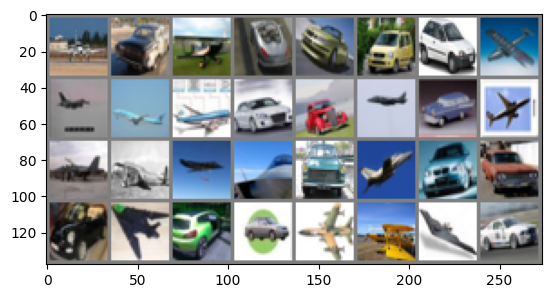

plane car   plane car   car   car   car   plane plane plane plane car   car   plane car   plane plane plane plane plane car   plane car   car   car   plane car   car   plane plane plane car  


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [4]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [5]:
import torch.optim as optim

In [6]:
nets = [Net().to(device) for i in range(10)]

for i, net in enumerate(nets):

    print(f"Net:{i}")
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

    for epoch in range(2):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data[0].to(device), data[1].to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
                running_loss = 0.0

print('Finished Training')

Net:0
Net:1
Net:2
Net:3
Net:4
Net:5
Net:6
Net:7
Net:8
Net:9
Finished Training


In [8]:
labels.tolist()

[0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1]

In [9]:
import numpy as np
print(testset.data.dtype, type(testset.targets[0]))
idx = np.argsort(testset.targets)
testset.targets = np.array(testset.targets)
testset.data = testset.data[np.where(testset.targets < 2)]
testset.targets = testset.targets[np.where(testset.targets < 2)]
testset.targets = [int(i) for i in testset.targets]
print(testset.data.dtype, type(testset.targets[0]))

uint8 <class 'int'>
uint8 <class 'int'>


In [10]:
preds = []
truths = []

for i, net in enumerate(nets):

    pred = []
    truth = []

    print(f"Net:{i}")

    with torch.no_grad():

        running_loss = 0.0
        for i, data in enumerate(testloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data[0].to(device), data[1].to(device)

            # forward + backward + optimize
            outputs = net(inputs)
            pred.extend(F.softmax(outputs, dim = 1).tolist())
            truth.extend(labels.tolist())

            # print statistics

    preds.append(pred)
    truths.append(truth)

    print('Finished Testing')

Net:0
Finished Testing
Net:1
Finished Testing
Net:2
Finished Testing
Net:3
Finished Testing
Net:4
Finished Testing
Net:5
Finished Testing
Net:6
Finished Testing
Net:7
Finished Testing
Net:8
Finished Testing
Net:9
Finished Testing


In [11]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import norm 
import statistics 


def plot_dist(image_no=0):

    print(f"Class of given image is {truths[0][image_no]}")

    dist = []
    for i in range(len(truths)):

        if truths[0][image_no]  == 0:
            dist.append(1 - preds[i][image_no][truths[0][image_no]])
        if truths[0][image_no] == 1:
            dist.append(preds[i][image_no][truths[0][image_no]])
    
    # Plot between -10 and 10 with .001 steps. 
    x_axis = np.arange(0, 1, 0.01) 
    
    # Calculating mean and standard deviation 
    mean = statistics.mean(dist) 
    sd = statistics.stdev(dist) 
  
    plt.plot(x_axis, norm.pdf(x_axis, mean, sd)) 
    plt.show()
    return dist

Class of given image is 0


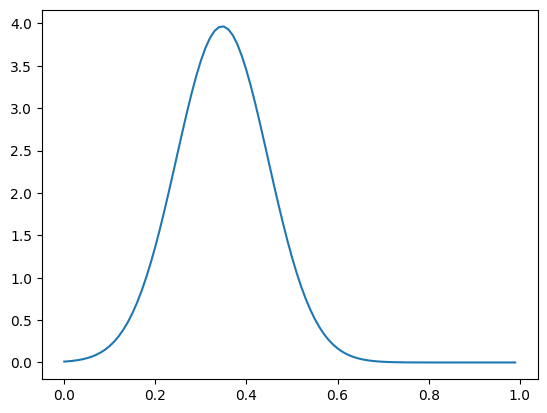

[0.23571449518203735,
 0.1916477084159851,
 0.3897750973701477,
 0.323413610458374,
 0.2957249879837036,
 0.4313235878944397,
 0.28609752655029297,
 0.47798818349838257,
 0.34145885705947876,
 0.4935634732246399]

In [12]:
plot_dist(0)

Class of given image is 1


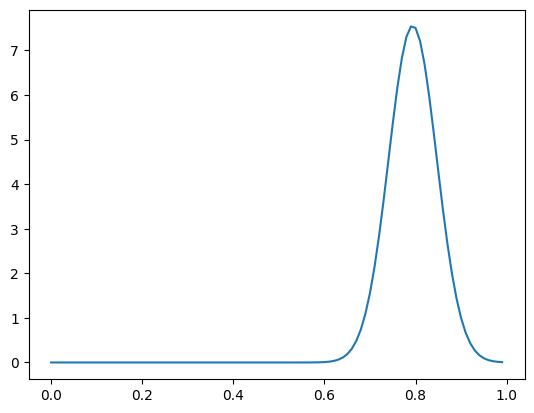

[0.8446884751319885,
 0.7742162346839905,
 0.742765486240387,
 0.7798244953155518,
 0.7721125483512878,
 0.7967773079872131,
 0.875302255153656,
 0.8430942893028259,
 0.6968001127243042,
 0.812580943107605]

In [76]:
plot_dist(1)

Class of given image is 1


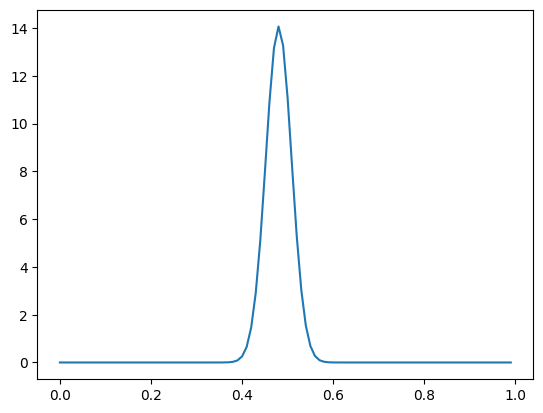

[0.46462446451187134,
 0.44949668645858765,
 0.45876622200012207,
 0.4884280562400818,
 0.43491217494010925,
 0.48380792140960693,
 0.49290531873703003,
 0.5039156675338745,
 0.5298610925674438,
 0.49671584367752075]

In [13]:
plot_dist(2)

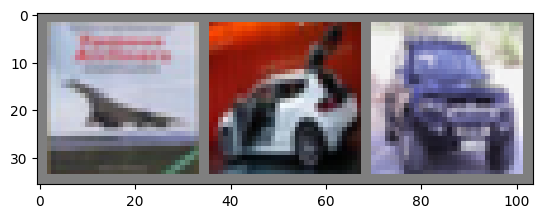

plane car   car   plane plane plane car   plane plane car   plane car   car   plane plane plane car   car   plane car   plane car   plane car   car   plane plane car   plane plane plane plane


In [14]:
# get some random training images
dataiter = iter(testloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images[:3]))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))